# **Campus Placement Analysis & Prediction**

Campus placement or campus recruiting is a program conducted within universities or other educational institutions to provide jobs to students nearing completion of their studies. In this type of program, the educational institutions partner with corporations who wish to recruit from the student population.


Here, in this project we will analyze various features that affect campus placements and then perform prediction using decision tree regressor algorithm.

Following steps are followed:

-  Data preprocessing and exploration to understand what kind of data will we working on.
-  Data Visualization to draw insights and get better underdstanding on different columns present in the dataset which will also give clear analysis.
-  Data Training using train-test-split method from sklearn to split the data into training and testing data & Model Creation using decision tree regressor algorithm.
-  Performance Evaluation by error and accuracy check to find how efficient algorithm is for this project.

For the dataset being used in this project [click here](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)


### **Data Preprocessing & Exploration**

In [1]:
#importing pandas library.
import pandas as pd

In [2]:
#loading and reading data through following
data=pd.read_csv('/content/Placement_Data_Full_Class.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
#to view shape of the dataset i.e. total number of rows and columns.
data.shape

(215, 15)

In [4]:
#to view first 5 rows of the dataset.
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#to view last 5 rows of the dataset.
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [6]:
#to view different columns of the dataset.
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
#to view memory usage, non-null values, datatypes of columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
#to view statistical summary of the dataset.
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
#to check for any missing or null values in the dataset.
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There are 67 null values in 'salary', we can't proceed with this.

We need to replace the null values by the mean of that respective column.

In [10]:
data['salary'].isnull().sum()

67

In [11]:
data['salary'].mean()

288655.4054054054

In [12]:
data['salary'].fillna('288655',inplace=True)
# fillna fucntion will fill the null values(where null=TRUE) with the mean value.

In [13]:
data['salary'].isnull().sum()

0

In [14]:
#to check again for any missing or null values in the dataset.
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
#to view total null values in the dataset.
data.isnull().sum().sum()

0

Now that the dataset has no null values i.e. dataset is cleaned and proper.

We can now proceed with further steps.

### **Data Visualization**

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Gender of the candidate ')

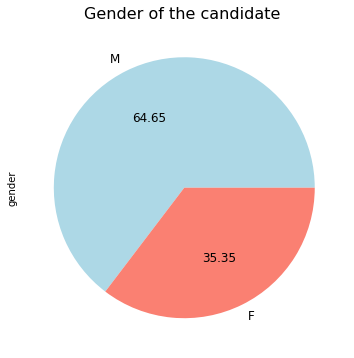

In [17]:
data['gender'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','salmon'])
plt.title("Gender of the candidate ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


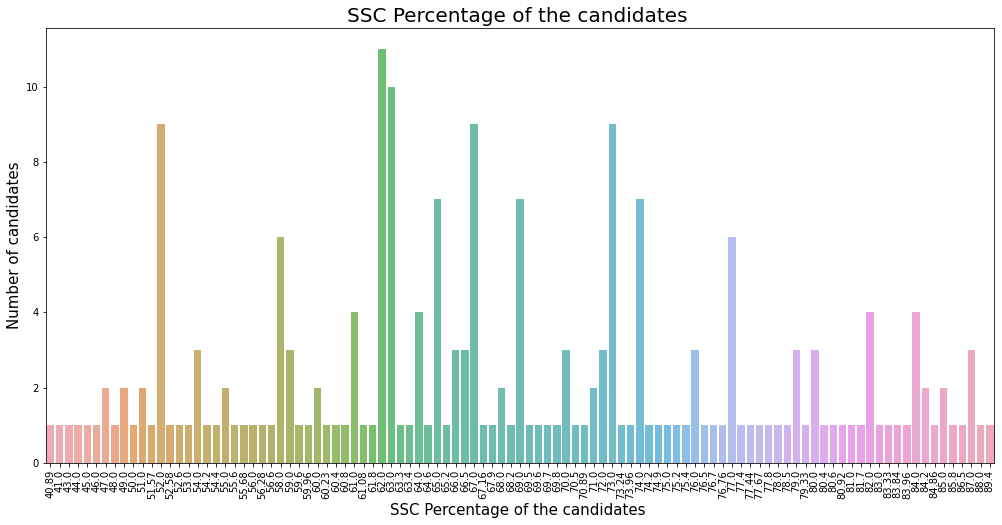

In [23]:
count=data['ssc_p'].value_counts().sort_index()
plt.figure(figsize=(17,8))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("SSC Percentage of the candidates ", fontsize=20)
plt.ylabel('Number of candidates', fontsize=15)
plt.xlabel("SSC Percentage of the candidates ", fontsize=15)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'SSC Board of the candidate ')

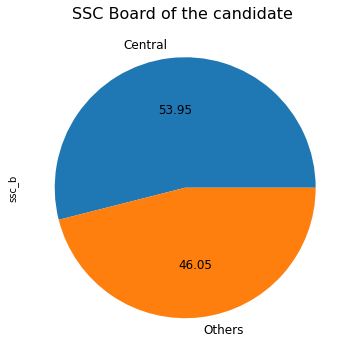

In [25]:
data['ssc_b'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title("SSC Board of the candidate ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


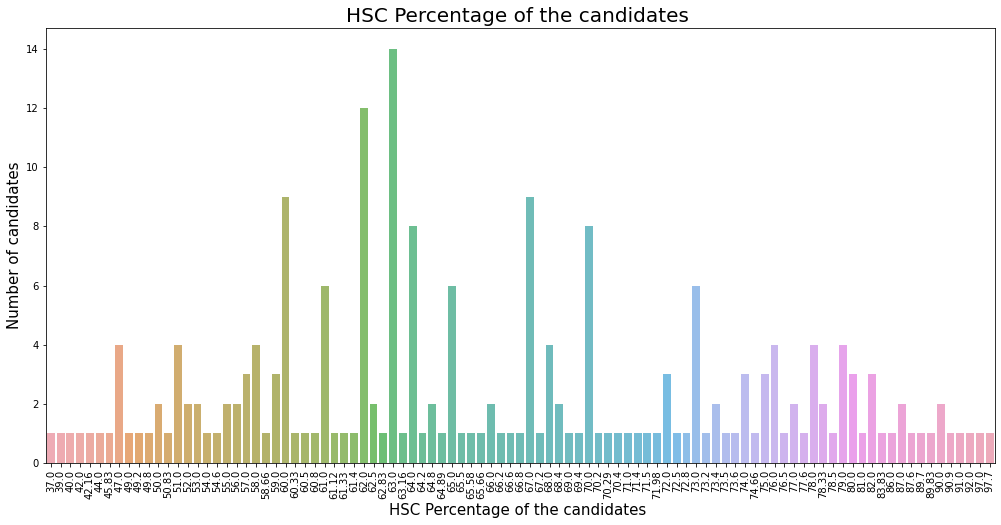

In [26]:
count=data['hsc_p'].value_counts().sort_index()
plt.figure(figsize=(17,8))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("HSC Percentage of the candidates ", fontsize=20)
plt.ylabel('Number of candidates', fontsize=15)
plt.xlabel("HSC Percentage of the candidates ", fontsize=15)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'HSC Board of the candidate ')

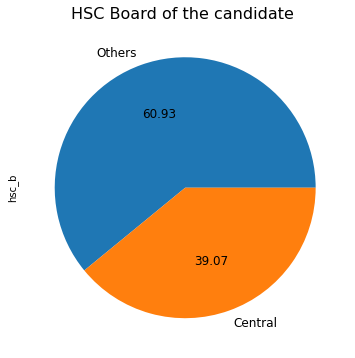

In [28]:
data['hsc_b'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title("HSC Board of the candidate ",fontsize=16)

Text(0.5, 1.0, 'HSC Stream of the candidate ')

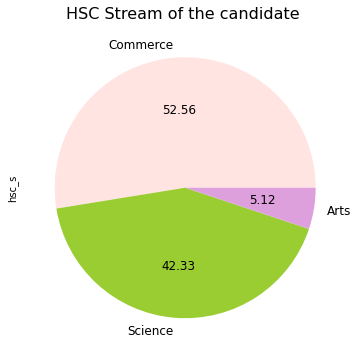

In [53]:
data['hsc_s'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['mistyrose','yellowgreen','plum'])
plt.title("HSC Stream of the candidate ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


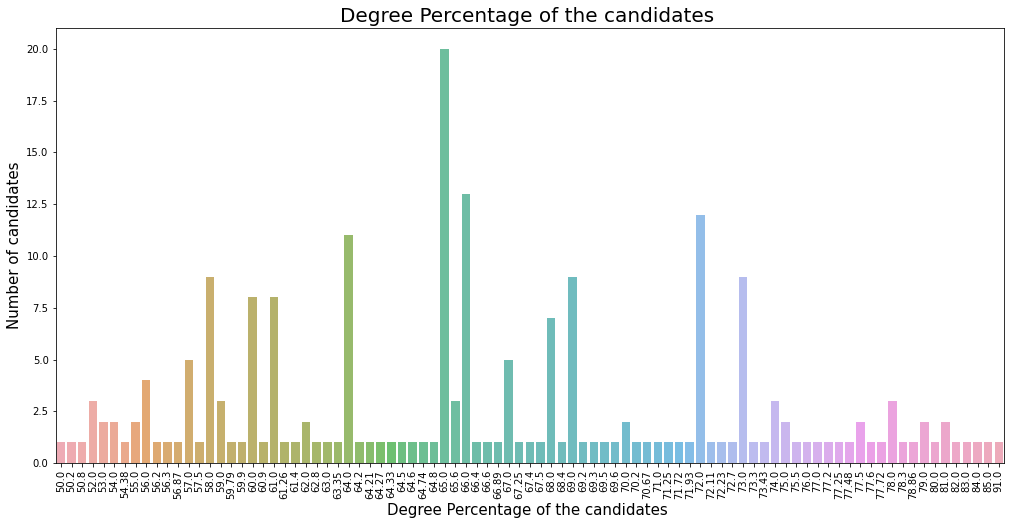

In [29]:
count=data['degree_p'].value_counts().sort_index()
plt.figure(figsize=(17,8))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Degree Percentage of the candidates ", fontsize=20)
plt.ylabel('Number of candidates', fontsize=15)
plt.xlabel("Degree Percentage of the candidates ", fontsize=15)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Degree Title of the candidate ')

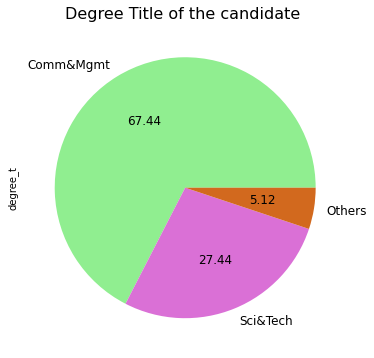

In [32]:
data['degree_t'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','orchid','chocolate'])
plt.title("Degree Title of the candidate ",fontsize=16)

Text(0.5, 1.0, 'If the candudate has any Work Experience ?')

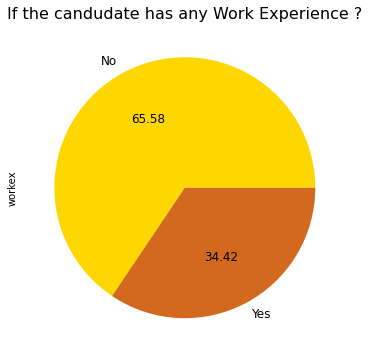

In [36]:
data['workex'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['gold','chocolate'])
plt.title("If the candudate has any Work Experience ?",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


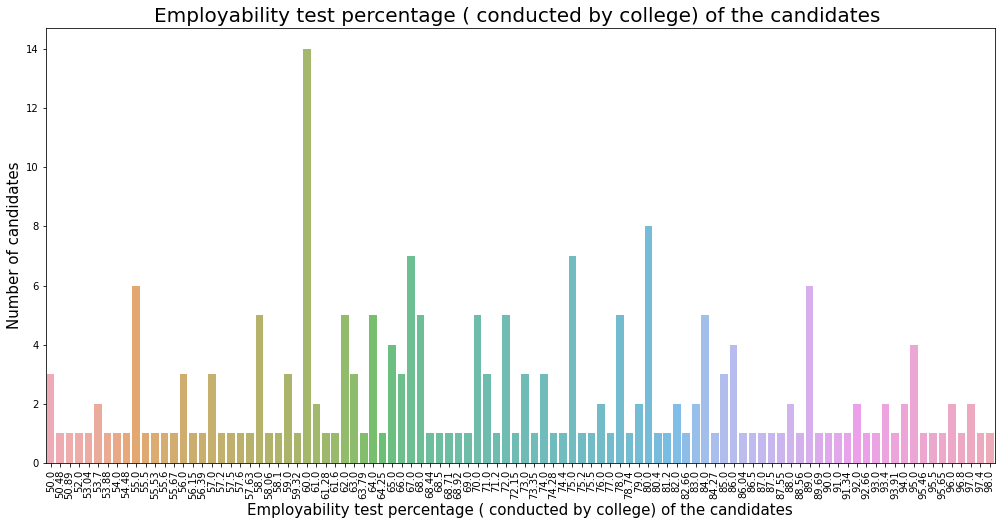

In [39]:
count=data['etest_p'].value_counts().sort_index()
plt.figure(figsize=(17,8))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Employability test percentage ( conducted by college) of the candidates ", fontsize=20)
plt.ylabel('Number of candidates', fontsize=15)
plt.xlabel("Employability test percentage ( conducted by college) of the candidates", fontsize=15)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Post Graduation(MBA)- Specialization of the candidates ')

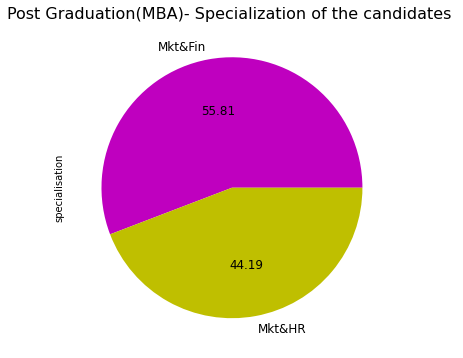

In [42]:
data['specialisation'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['m','y'])
plt.title("Post Graduation(MBA)- Specialization of the candidates ", fontsize=16)

Text(0.5, 1.0, 'Status of placement- Placed/Not placed of the candidates ')

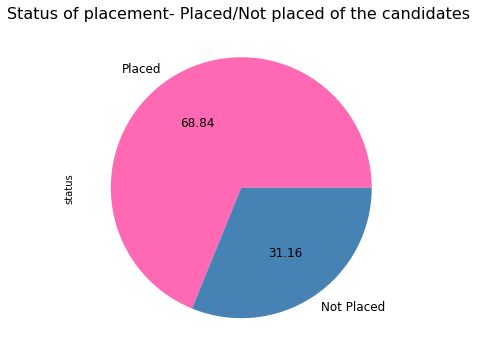

In [49]:
data['status'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['hotpink','steelblue'])
plt.title("Status of placement- Placed/Not placed of the candidates ", fontsize=16)

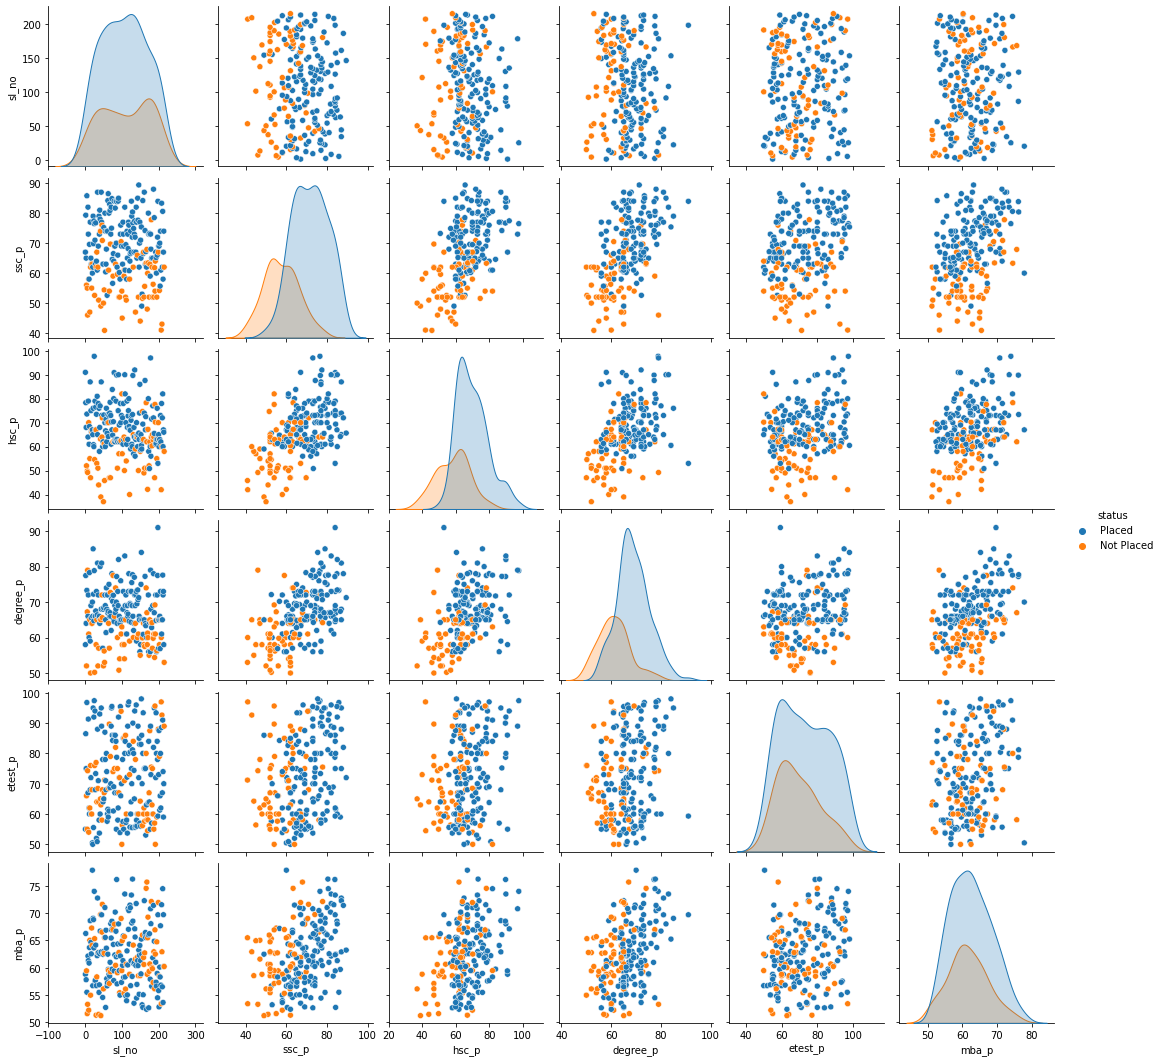

In [50]:
sns.pairplot(data,hue='status')

Insights drawn through data visualization & analysis:
*   64.65% candidate are males and rest 35.35 % are females.
*   Lowest SSC percentage among all candidates is 40.89% and highest is 89.4%.
*   53.95 % of candidates gave their SSC exams under Central Board and rest 46.05% were from other board.
*  Lowest HSC percentage among all candidates is 37.0% and highest is 97.7%.
*  Only 39.07 % of candidates gave their HSC exams under Central Board and rest 60.93% were from other board.
*  Among all the candidates 52.56% candidates are from commmerce stream, 42.33% candidates are from Science stream and rest 5.12% candidates are from Arts Stream.
*  Lowest Degree percentage among all candidates is 50.0% and highest is 91.0%.
*  Degree title of 67.44% candidates is Commerce & Management, for 27.44% candidates is Science & Technology and rest 5.12% have other degree title.
*  65.58 % candidates have no work experience and rest 34.42% have valid work experience.
*  Lowest Employability test percentage ( conducted by college) percentage among all candidates is 50.0% and highest is 98.0%.
*  Among all the candidates 55.81% candidates have Marketing & Finance Post Graduation(MBA)- Specialization and rest 44.19 % have Marketing & HR Post Graduation(MBA)- Specialization.
* Among all the candidates 68.84% candidates have been successfully placed and rest 31.16 % have not been placed.



### **Data Training**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    object 
dtypes: float64(5), int64(1), object(9)
memory usage: 25.3+ KB


In [55]:
data1=data.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sl_no     215 non-null    int64  
 1   ssc_p     215 non-null    float64
 2   hsc_p     215 non-null    float64
 3   degree_p  215 non-null    float64
 4   etest_p   215 non-null    float64
 5   mba_p     215 non-null    float64
 6   salary    215 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 11.9+ KB


In [56]:
#converting data into int datatype to avoid errors below.
prepareddata=data1.astype(int)
prepareddata.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67,91,58,55,58,270000
1,2,79,78,77,86,66,200000
2,3,65,68,64,75,57,250000
3,4,56,52,52,66,59,288655
4,5,85,73,73,96,55,425000


In [57]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have feature and y will have our target.
x=prepareddata.drop(['salary'],axis=1)  
y=prepareddata['salary']

In [58]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=500) 
#Ratio used for splitting training and testing data is 8:2 respectively

### **Model Creation using Decision Tree Regressor Algorithm**

In [59]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg = DecisionTreeRegressor()

In [60]:
#Fitting data into the model.
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
# Making predictions on Test data 
pred = reg.predict(x_test)

In [62]:
pred

array([288655., 288655., 350000., 288655., 300000., 204000., 300000.,
       200000., 288655., 260000., 216000., 288655., 340000., 268000.,
       500000., 288655., 360000., 220000., 288655., 288655., 270000.,
       218000., 288655., 240000., 500000., 265000., 300000., 500000.,
       230000., 265000., 240000., 210000., 220000., 216000., 264000.,
       250000., 250000., 300000., 220000., 288655., 360000., 260000.,
       360000.])

### **Performance Evaluation**

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t    Accuracy of the model") 
print("""Decision Tree Regressor \t\t {:.2f} \t \t\t {:.2f}""".format(  np.sqrt(mean_squared_error(y_test, pred)), reg.score(x_train,y_train)))

Model			          RootMeanSquareError  		    Accuracy of the model
Decision Tree Regressor 		 105596.58 	 		 1.00


Conclusion Drawn:
*  Accuracy of the decision tree regressor model for this project is 1.00 which is an excellent accuracy.

*  Decision tree regressor is a highly efficient model and widely used for regression tasks,various prediction projects etc.





**Author**

[Ayushi Shrivastava](https://github.com/ayushi424)